In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.feature_selection import mutual_info_regression

In [3]:
!pip show numpy
!pip show scikit-learn

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [4]:
df = pd.read_csv('Historical Forex Data/EURUSD_H1.csv')

In [5]:
df.head()

,Time,Open,High,Low,Close,Volume
0,27/08/2008 21:00,1.47267,1.47289,1.47065,1.47133,11163
1,27/08/2008 22:00,1.47141,1.47265,1.47112,1.47225,8315
2,27/08/2008 23:00,1.47232,1.47438,1.47147,1.47430,12788
3,28/08/2008 0:00,1.47462,1.47652,1.47381,1.47561,27818
4,28/08/2008 1:00,1.47542,1.47863,1.47441,1.47797,24200


In [6]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)

In [7]:
df.tail()

,Time,Open,High,Low,Close,Volume
99995,2024-09-05 03:00:00,1.10796,1.10797,1.10761,1.10769,3522
99996,2024-09-05 04:00:00,1.10769,1.10778,1.10746,1.10769,4143
99997,2024-09-05 05:00:00,1.10767,1.10806,1.10766,1.10802,4994
99998,2024-09-05 06:00:00,1.10802,1.10881,1.10796,1.10837,9073
99999,2024-09-05 07:00:00,1.10837,1.10903,1.10798,1.10871,10800


In [8]:
df.describe()

,Time,Open,High,Low,Close,Volume
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2016-08-30 18:57:18.936000256,1.208629,1.209581,1.207692,1.208628,10953.855990
min,2008-08-27 21:00:00,0.953900,0.955920,0.953570,0.953900,1.000000
25%,2012-08-24 16:45:00,1.104490,1.105278,1.103750,1.104500,3808.750000
50%,2016-08-30 20:30:00,1.177280,1.177920,1.176640,1.177280,7423.000000
75%,2020-09-03 09:15:00,1.316702,1.317840,1.315610,1.316690,13464.000000
max,2024-09-05 07:00:00,1.514230,1.514410,1.512830,1.514200,688880.000000
std,NaN,0.123311,0.123524,0.123085,0.123310,12040.398259


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    100000 non-null  datetime64[ns]
 1   Open    100000 non-null  float64       
 2   High    100000 non-null  float64       
 3   Low     100000 non-null  float64       
 4   Close   100000 non-null  float64       
 5   Volume  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 MB


In [10]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df.isnull().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Visualization

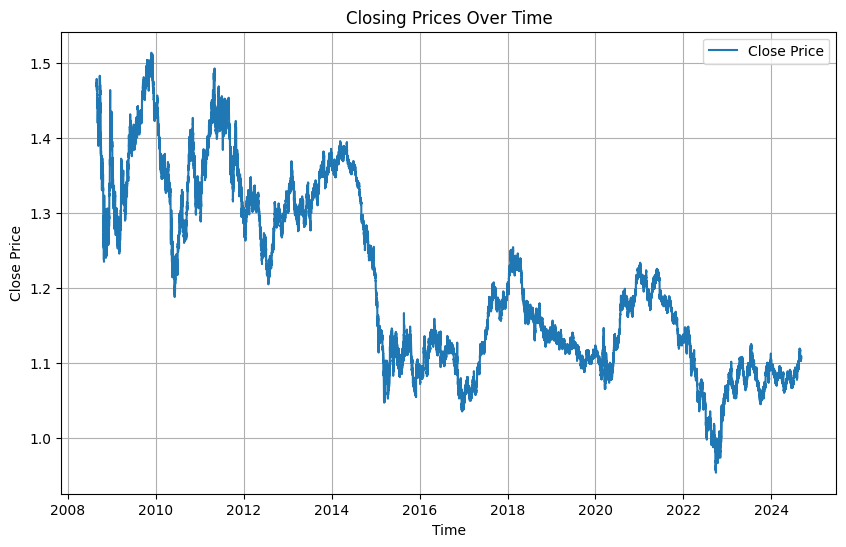

In [12]:
# 1. Line Chart for Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Close'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

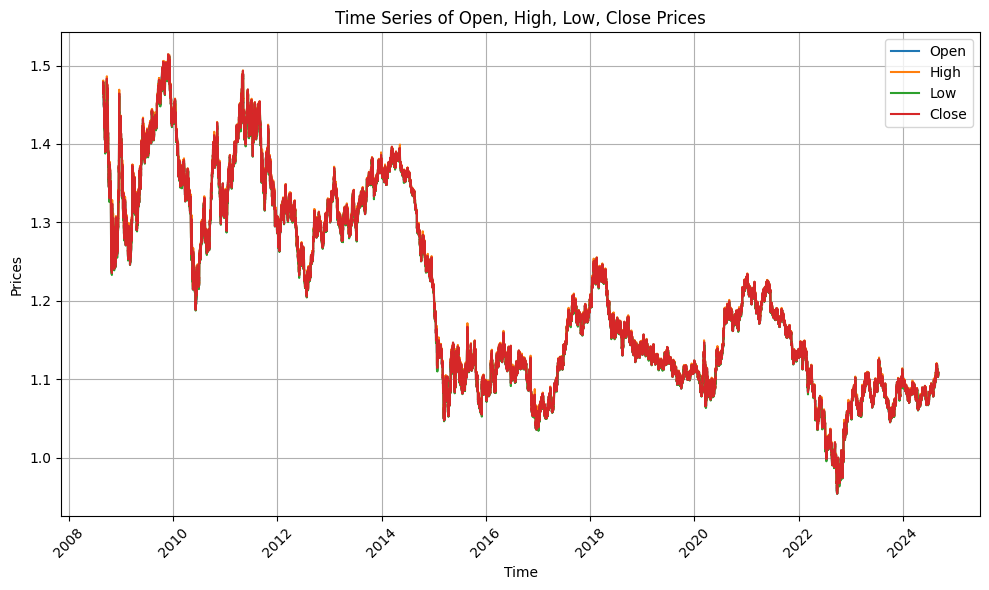

In [13]:
# Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Open'], label='Open')
plt.plot(df['Time'], df['High'], label='High')
plt.plot(df['Time'], df['Low'], label='Low')
plt.plot(df['Time'], df['Close'], label='Close')
plt.title('Time Series of Open, High, Low, Close Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Daniel\Documents\Vacation_projects\fpa_venv\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


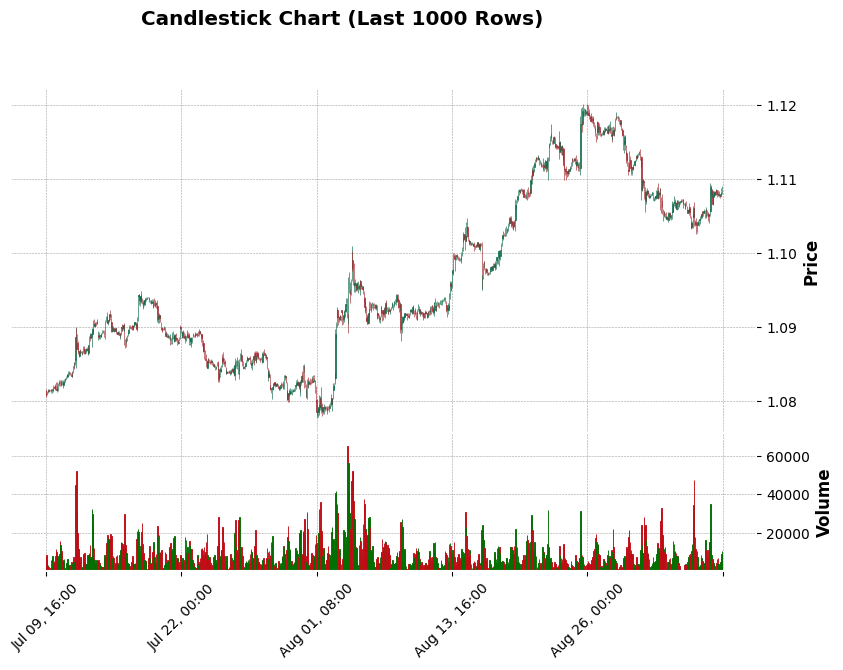

In [14]:
# Subset the last 1000 rows
subset_df = df[-1000:]  # You can adjust the number of rows here

# Set the 'Time' as the index for plotting
subset_df.set_index('Time', inplace=True)

# Plot the subset of data
mpf.plot(subset_df, type='candle', volume=True, style='charles', title='Candlestick Chart (Last 1000 Rows)',figratio=(12,8), figscale=1.2)


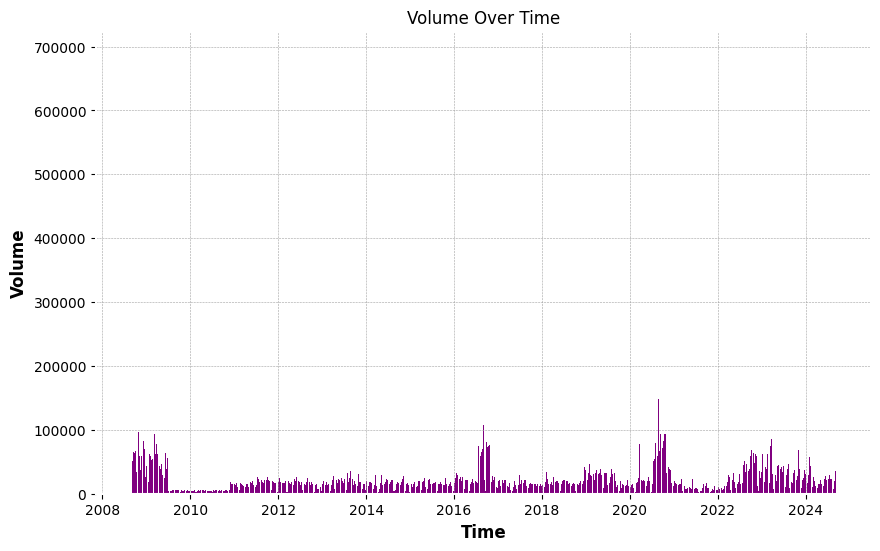

In [15]:
# 3. Volume Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Time'], df['Volume'], color='purple')
plt.title('Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


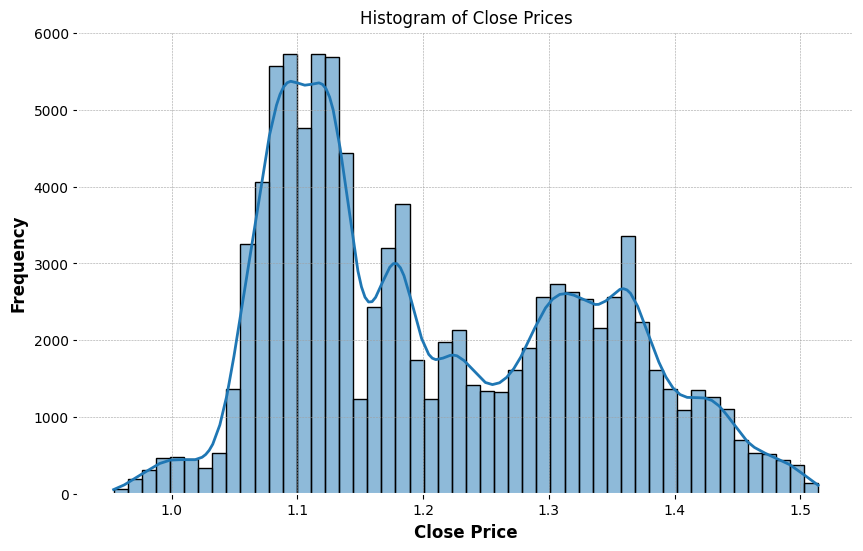

In [16]:
# 5. Histogram of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

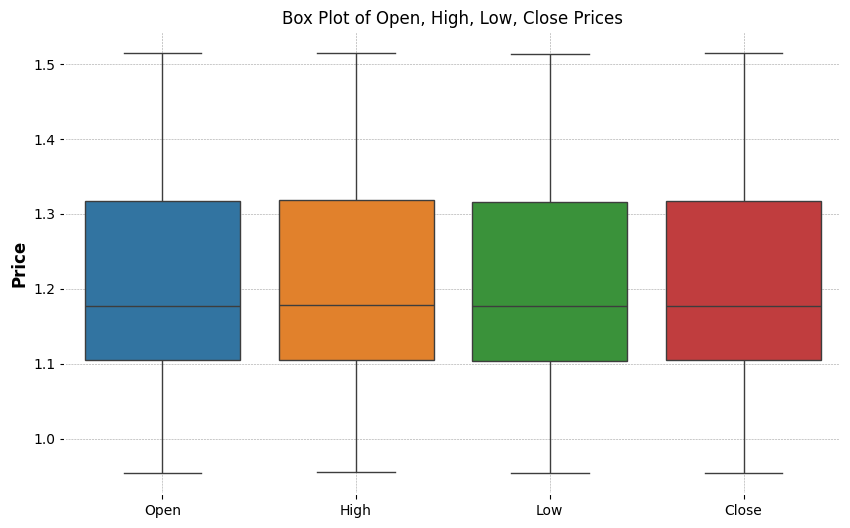

In [17]:
# 6. Box Plot for Price Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Open, High, Low, Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

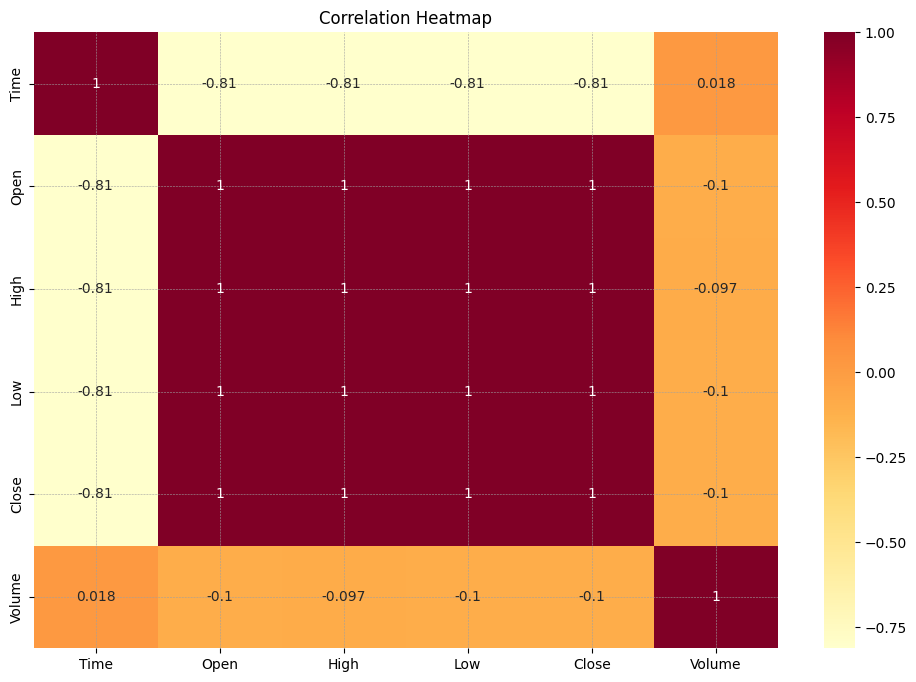

In [18]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

**Creating more features**

In [19]:
# 1. High-Low Range
df['High_Low_Range'] = df['High'] - df['Low']

# 2. Open-High Range
df['Open_High_Range'] = df['High'] - df['Open']

# 3. Open-Low Range
df['Open_Low_Range'] = df['Open'] - df['Low']

# 4. Rolling Volatility (using a 3-period window)
df['Rolling_Volatility'] = df[['Open', 'High', 'Low']].std(axis=1).rolling(window=3).mean()

# 5. True Range
df['True_Range'] = df.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Open']), abs(row['Low'] - row['Open'])), axis=1)

# 6. Moving Averages (SMA)
df['SMA_Open_3'] = df['Open'].rolling(window=3).mean()  # 3-period SMA of Open
df['SMA_High_3'] = df['High'].rolling(window=3).mean()  # 3-period SMA of High

# 7. Price Momentum (for Open and High, lag of 1 period)
df['Momentum_Open_1'] = df['Open'] - df['Open'].shift(1)
df['Momentum_High_1'] = df['High'] - df['High'].shift(1)

# 8. Exponential Moving Average (EMA) for Open (with a smoothing factor, alpha)
df['EMA_Open'] = df['Open'].ewm(span=3, adjust=False).mean()  # 3-period EMA of Open

# 9. Volume Change (percentage change)
df['Volume_Change'] = df['Volume'].pct_change() * 100

# 10. Moving Average of Volume (SMA)
df['SMA_Volume_3'] = df['Volume'].rolling(window=3).mean()

# 11. Lagged features for Open, High, Low, and Volume (lag of 1 period)
df['Lagged_Open_1'] = df['Open'].shift(1)
df['Lagged_High_1'] = df['High'].shift(1)
df['Lagged_Low_1'] = df['Low'].shift(1)
df['Lagged_Volume_1'] = df['Volume'].shift(1)

# Display the resulting DataFrame with new features
print(df)


                     Time     Open     High      Low    Close  Volume  \
0     2008-08-27 21:00:00  1.47267  1.47289  1.47065  1.47133   11163   
1     2008-08-27 22:00:00  1.47141  1.47265  1.47112  1.47225    8315   
2     2008-08-27 23:00:00  1.47232  1.47438  1.47147  1.47430   12788   
3     2008-08-28 00:00:00  1.47462  1.47652  1.47381  1.47561   27818   
4     2008-08-28 01:00:00  1.47542  1.47863  1.47441  1.47797   24200   
...                   ...      ...      ...      ...      ...     ...   
99995 2024-09-05 03:00:00  1.10796  1.10797  1.10761  1.10769    3522   
99996 2024-09-05 04:00:00  1.10769  1.10778  1.10746  1.10769    4143   
99997 2024-09-05 05:00:00  1.10767  1.10806  1.10766  1.10802    4994   
99998 2024-09-05 06:00:00  1.10802  1.10881  1.10796  1.10837    9073   
99999 2024-09-05 07:00:00  1.10837  1.10903  1.10798  1.10871   10800   

       High_Low_Range  Open_High_Range  Open_Low_Range  Rolling_Volatility  \
0             0.00224          0.00022       

In [20]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
0,2008-08-27 21:00:00,1.47267,1.47289,1.47065,1.47133,11163,0.00224,0.00022,0.00202,NaN,...,NaN,NaN,NaN,1.47267,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-08-27 22:00:00,1.47141,1.47265,1.47112,1.47225,8315,0.00153,0.00124,0.00029,NaN,...,NaN,-0.00126,-0.00024,1.47204,-25.512855,NaN,1.47267,1.47289,1.47065,11163.0
2,2008-08-27 23:00:00,1.47232,1.47438,1.47147,1.47430,12788,0.00291,0.00206,0.00085,0.001181,...,1.473307,0.00091,0.00173,1.47218,53.794348,10755.333333,1.47141,1.47265,1.47112,8315.0
3,2008-08-28 00:00:00,1.47462,1.47652,1.47381,1.47561,27818,0.00271,0.00190,0.00081,0.001233,...,1.474517,0.00230,0.00214,1.47340,117.532061,16307.000000,1.47232,1.47438,1.47147,12788.0
4,2008-08-28 01:00:00,1.47542,1.47863,1.47441,1.47797,24200,0.00422,0.00321,0.00101,0.001697,...,1.476510,0.00080,0.00211,1.47441,-13.005967,21602.000000,1.47462,1.47652,1.47381,27818.0


In [21]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    2
True_Range            0
SMA_Open_3            2
SMA_High_3            2
Momentum_Open_1       1
Momentum_High_1       1
EMA_Open              0
Volume_Change         1
SMA_Volume_3          2
Lagged_Open_1         1
Lagged_High_1         1
Lagged_Low_1          1
Lagged_Volume_1       1
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

Time                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
High_Low_Range        0
Open_High_Range       0
Open_Low_Range        0
Rolling_Volatility    0
True_Range            0
SMA_Open_3            0
SMA_High_3            0
Momentum_Open_1       0
Momentum_High_1       0
EMA_Open              0
Volume_Change         0
SMA_Volume_3          0
Lagged_Open_1         0
Lagged_High_1         0
Lagged_Low_1          0
Lagged_Volume_1       0
dtype: int64

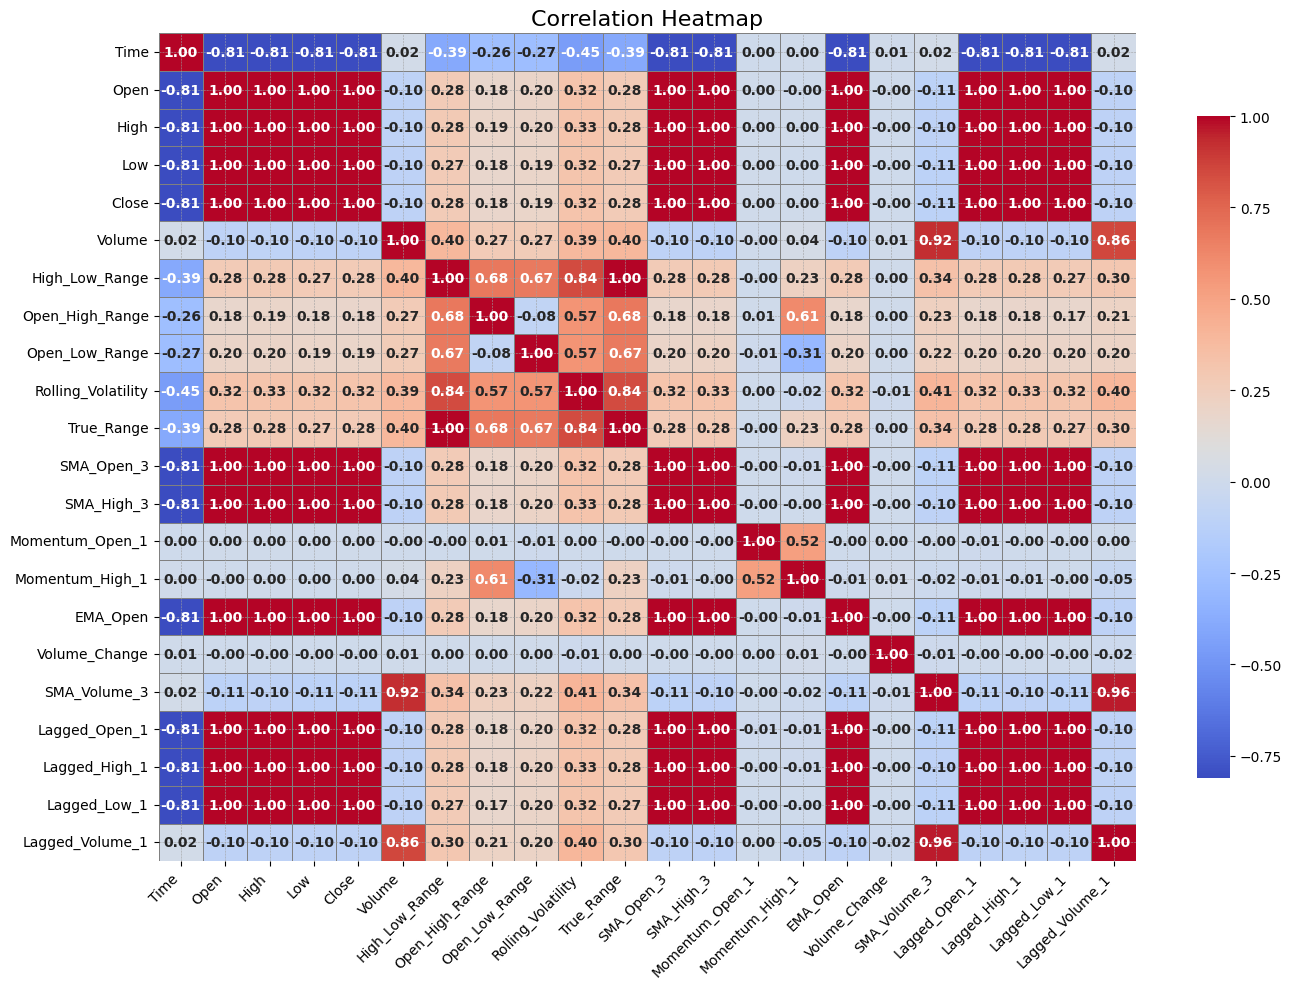

In [24]:
plt.figure(figsize=(14, 10))

corr = df.corr()
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 10, "weight": 'bold'},
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [25]:
# Extract the target column
target = 'Close'

# Calculate Correlation with target column
correlation = df.corr()[target]

# Calculate Mutual Information
# Ensure that data types are numeric for mutual_info_regression
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(columns=[target])
y = df[target]

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to hold mutual information values
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi
})

# Merge mutual information with correlation
results = pd.DataFrame({
    'Correlation': correlation.drop(target),
    'Mutual_Information': mi_df.set_index('Feature')['Mutual_Information']
})

# Display results
print(results)

                    Correlation  Mutual_Information
EMA_Open               0.999906            4.323243
High                   0.999961            5.091705
High_Low_Range         0.277326            0.102969
Lagged_High_1          0.999890            4.282812
Lagged_Low_1           0.999891            4.288751
Lagged_Open_1          0.999859            4.112452
Lagged_Volume_1       -0.099669            0.091298
Low                    0.999962            5.105382
Momentum_High_1        0.004628            0.030336
Momentum_Open_1        0.004262            0.032637
Open                   0.999929            4.470993
Open_High_Range        0.184995            0.040472
Open_Low_Range         0.191760            0.037585
Rolling_Volatility     0.320812            0.132678
SMA_High_3             0.999919            4.446124
SMA_Open_3             0.999891            4.246499
SMA_Volume_3          -0.106357            0.119078
Time                  -0.810793                 NaN
True_Range  

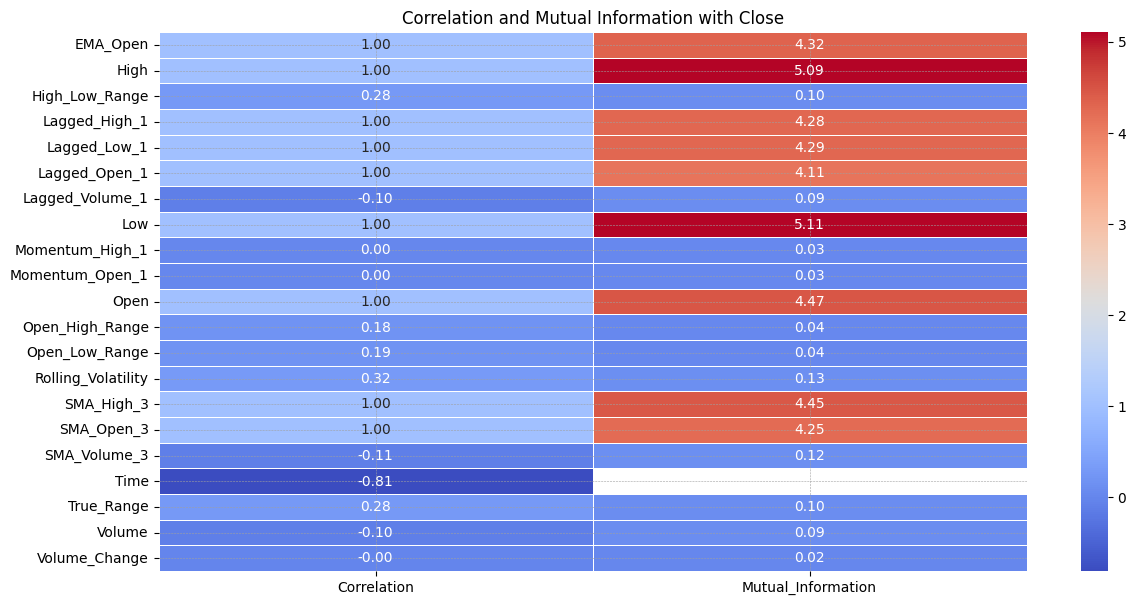

In [26]:
# Plotting the results
plt.figure(figsize=(14, 7))
sns.heatmap(results, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation and Mutual Information with Close')
plt.show()

In [27]:
df.head()

,Time,Open,High,Low,Close,Volume,High_Low_Range,Open_High_Range,Open_Low_Range,Rolling_Volatility,...,SMA_High_3,Momentum_Open_1,Momentum_High_1,EMA_Open,Volume_Change,SMA_Volume_3,Lagged_Open_1,Lagged_High_1,Lagged_Low_1,Lagged_Volume_1
2,2008-08-27 23:00:00,1.47232,1.47438,1.47147,1.47430,12788,0.00291,0.00206,0.00085,0.001181,...,1.473307,0.00091,0.00173,1.472180,53.794348,10755.333333,1.47141,1.47265,1.47112,8315.0
3,2008-08-28 00:00:00,1.47462,1.47652,1.47381,1.47561,27818,0.00271,0.00190,0.00081,0.001233,...,1.474517,0.00230,0.00214,1.473400,117.532061,16307.000000,1.47232,1.47438,1.47147,12788.0
4,2008-08-28 01:00:00,1.47542,1.47863,1.47441,1.47797,24200,0.00422,0.00321,0.00101,0.001697,...,1.476510,0.00080,0.00211,1.474410,-13.005967,21602.000000,1.47462,1.47652,1.47381,27818.0
5,2008-08-28 02:00:00,1.47788,1.47913,1.47699,1.47731,23510,0.00214,0.00125,0.00089,0.001557,...,1.478093,0.00246,0.00050,1.476145,-2.851240,25176.000000,1.47542,1.47863,1.47441,24200.0
6,2008-08-28 03:00:00,1.47733,1.47910,1.47698,1.47895,17514,0.00212,0.00177,0.00035,0.001472,...,1.478953,-0.00055,-0.00003,1.476738,-25.504041,21741.333333,1.47788,1.47913,1.47699,23510.0


In [28]:
df.dtypes

Time                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                         int64
High_Low_Range               float64
Open_High_Range              float64
Open_Low_Range               float64
Rolling_Volatility           float64
True_Range                   float64
SMA_Open_3                   float64
SMA_High_3                   float64
Momentum_Open_1              float64
Momentum_High_1              float64
EMA_Open                     float64
Volume_Change                float64
SMA_Volume_3                 float64
Lagged_Open_1                float64
Lagged_High_1                float64
Lagged_Low_1                 float64
Lagged_Volume_1              float64
dtype: object

In [29]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'High_Low_Range',
       'Open_High_Range', 'Open_Low_Range', 'Rolling_Volatility', 'True_Range',
       'SMA_Open_3', 'SMA_High_3', 'Momentum_Open_1', 'Momentum_High_1',
       'EMA_Open', 'Volume_Change', 'SMA_Volume_3', 'Lagged_Open_1',
       'Lagged_High_1', 'Lagged_Low_1', 'Lagged_Volume_1'],
      dtype='object')

## Splitting the Data

In [30]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Next_Close' is the target column

# Separate features and target
X = df.drop(columns=['Close','Time'])
y = df['Close']

# First split: Train and temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 69998
Validation set size: 15000
Testing set size: 15000


## Training and Evaluating Models

**Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

# Define the hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive':[True, False]
}

# Initialize the LinearRegression model
lr = LinearRegression()

# Setup the GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [32]:
# Train the model with the best hyperparameters
best_lr = grid_search.best_estimator_

In [33]:
# Cross-Validation (using 5-fold cross-validation)
cv_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print Cross-Validation scores
print("Cross-Validation RMSE Scores: ", np.sqrt(-cv_scores))
print("Mean CV RMSE: ", np.mean(np.sqrt(-cv_scores)))

Cross-Validation RMSE Scores:  [0.0005966  0.00061334 0.00061355 0.00061906 0.00060709]
Mean CV RMSE:  0.0006099280825961783


In [34]:
# Predict on validation and test sets using the best model
y_val_pred = best_lr.predict(X_val)
y_test_pred = best_lr.predict(X_test)

In [35]:
# Evaluate the model performance on validation and test sets
print("Linear Regression with Best Hyperparameters")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

Linear Regression with Best Hyperparameters
Validation RMSE: 0.0006020989006553255
Validation R^2: 0.9999760506331558
Test RMSE: 0.000606503654872696
Test R^2: 0.9999757040087367
Test MAE: 0.000399582326148698


**XGBoost Regressor**

In [37]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint
import numpy as np

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds (trees)
    'max_depth': randint(3, 15),  # Maximum tree depth for base learners
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used for each tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight for a leaf node
    'gamma': [0, 0.1, 0.2, 0.3]  # Minimum loss reduction to make a further partition
}

# Initialize the XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgbr,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best Hyperparameters: ", random_search.best_params_)

Best Hyperparameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 418, 'subsample': 0.8}


In [38]:
# Train the model with the best hyperparameters
best_xgbr = random_search.best_estimator_

In [39]:
# Predict on validation and test sets using the best model
y_val_pred = best_xgbr.predict(X_val)
y_test_pred = best_xgbr.predict(X_test)

# Evaluate the model performance on validation and test sets
print("XGBoost Regressor with Best Hyperparameters")
print(f"Validation RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred))}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

XGBoost Regressor with Best Hyperparameters
Validation RMSE: 0.0009360441984235372
Validation R^2: 0.9999421169936495
Test RMSE: 0.0010083427926378624
Test R^2: 0.9999328440998164
Test MAE: 0.0005826455830535894


In [41]:
import joblib 

# Saving the models
joblib.dump(best_lr, 'best_lr_D1.pkl')
joblib.dump(best_xgbr, 'best_xgbr_D1.pkl')

['best_xgbr_D1.pkl']